# 1.Original_Expression-Roboflow Dataset detailed Information

In [6]:
import os
import matplotlib.pyplot as plt

def analyze_yolo_dataset_total(dataset_path, dataset_name):
    emotions = ['anger', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    emotion_counts = {emotion: 0 for emotion in emotions}

    txt_file_count = 0

    for root, _, files in os.walk(dataset_path):
        for file_name in files:
            if file_name.endswith('.txt'):
                txt_file_count += 1  
                txt_file_path = os.path.join(root, file_name)
                
                try:
                    with open(txt_file_path, 'r') as file:
                        lines = file.readlines()
                        
                        for line in lines:
                            emotion_id = int(line.split()[0])
                            emotion = emotions[emotion_id]
                            emotion_counts[emotion] += 1
                except Exception as e:
                    print(f"Error reading file {file_name}: {e}")
                    continue

    for emotion, count in emotion_counts.items():
        print(f'{emotion}: {count} instances')

    print(f'Total number of txt files read: {txt_file_count}')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    wedges, texts, autotexts = ax1.pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', startangle=140)
    ax1.set_title(f'Distribution of Emotions in {dataset_name}', fontweight='bold', fontsize=15)
    ax1.axis('equal')  

    for text in texts + autotexts:
        text.set_fontsize(17)
        text.set_fontweight('bold')

    bars = ax2.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
    ax2.set_xlabel('Emotions', fontweight='bold', fontsize=17)
    ax2.set_ylabel('Number of Instances', fontweight='bold', fontsize=17)
    ax2.set_title(f'Number of Instances for Each Emotion in {dataset_name}', fontweight='bold', fontsize=15)

    for bar in bars:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontweight='bold', fontsize=17)

    ax2.tick_params(axis='x', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)

    plt.show()


anger: 896 instances
fear: 487 instances
happy: 1103 instances
neutral: 511 instances
sad: 797 instances
surprise: 152 instances
Total number of txt files read: 775


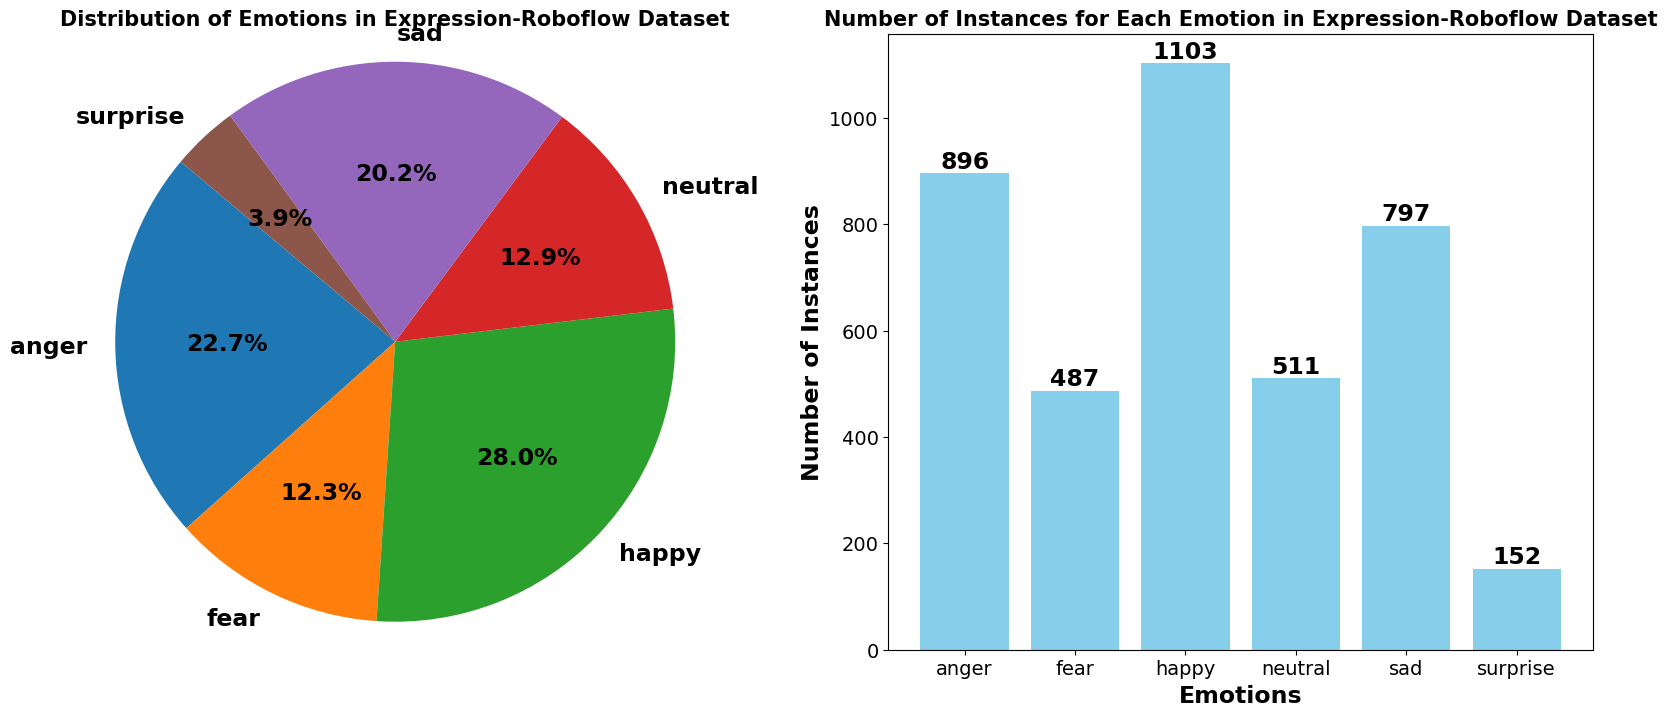

In [8]:

dataset_path = '/Users/piglet/Desktop/expression/*expression'
dataset_name = 'Expression-Roboflow Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def analyze_yolo_dataset_multiple(paths, dataset_names):
    # 定义情绪标签
    emotions = ['anger', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    def get_emotion_counts(dataset_path):
        emotion_counts = {emotion: 0 for emotion in emotions}
        txt_file_count = 0

        for root, _, files in os.walk(dataset_path):
            for file_name in files:
                if file_name.endswith('.txt'):
                    txt_file_count += 1
                    txt_file_path = os.path.join(root, file_name)

                    try:
                        with open(txt_file_path, 'r') as file:
                            lines = file.readlines()

                            for line in lines:
                                emotion_id = int(line.split()[0])
                                emotion = emotions[emotion_id]
                                emotion_counts[emotion] += 1
                    except Exception as e:
                        print(f"Error reading file {file_name}: {e}")
                        continue

        return emotion_counts, txt_file_count

    fig, axes = plt.subplots(1, 3, figsize=(30, 10))

    emotion_data = []

    for i, (dataset_path, dataset_name) in enumerate(zip(paths, dataset_names)):
        emotion_counts, txt_file_count = get_emotion_counts(dataset_path)
        emotion_data.append(emotion_counts)

        wedges, texts, autotexts = axes[i].pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'{dataset_name}', fontweight='bold', fontsize=36)
        axes[i].axis('equal')  

        for text in texts + autotexts:
            text.set_fontsize(22)
            text.set_fontweight('bold')

    emotion_df = pd.DataFrame(emotion_data, index=dataset_names)

    emotion_df['Total'] = emotion_df.sum(axis=1)

    print(emotion_df)

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis('off')
    tbl = ax.table(cellText=emotion_df.values, colLabels=emotion_df.columns, rowLabels=emotion_df.index, loc='center', cellLoc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)
    tbl.scale(1.2, 1.2)

    for key, cell in tbl.get_celld().items():
        if key[0] == 0 or key[1] == -1:
            cell.set_text_props(fontweight='bold', fontsize=14)

    plt.show()

    emotion_df = emotion_df.drop(columns=['Total'])  

    ax = emotion_df.T.plot(kind='bar', figsize=(15, 3), width=0.8)

    plt.xlabel('Emotions', fontweight='bold', fontsize=14)
    plt.ylabel('Number of Instances', fontweight='bold', fontsize=14)
    plt.xticks(rotation=0, fontsize=14)  
    plt.yticks(fontsize=14)
    plt.legend(title='Datasets', title_fontsize='13', fontsize='12')

    for idx, emotion in enumerate(emotion_df.columns):
        for i, dataset_name in enumerate(dataset_names):
            value = emotion_df.loc[dataset_name, emotion]
            total = emotion_df.loc[dataset_name].sum()
            percentage = (value / total) * 100
            ax.text(idx + (i * 0.25) - 0.2, value + 5, f'{value}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.show()


           anger  fear  happy  neutral  sad  surprise  Total
Train set    689   320    865      272  620       152   2918
Valid set    147   119    165      171  115         0    717
Test set      60    48     73       68   62         0    311


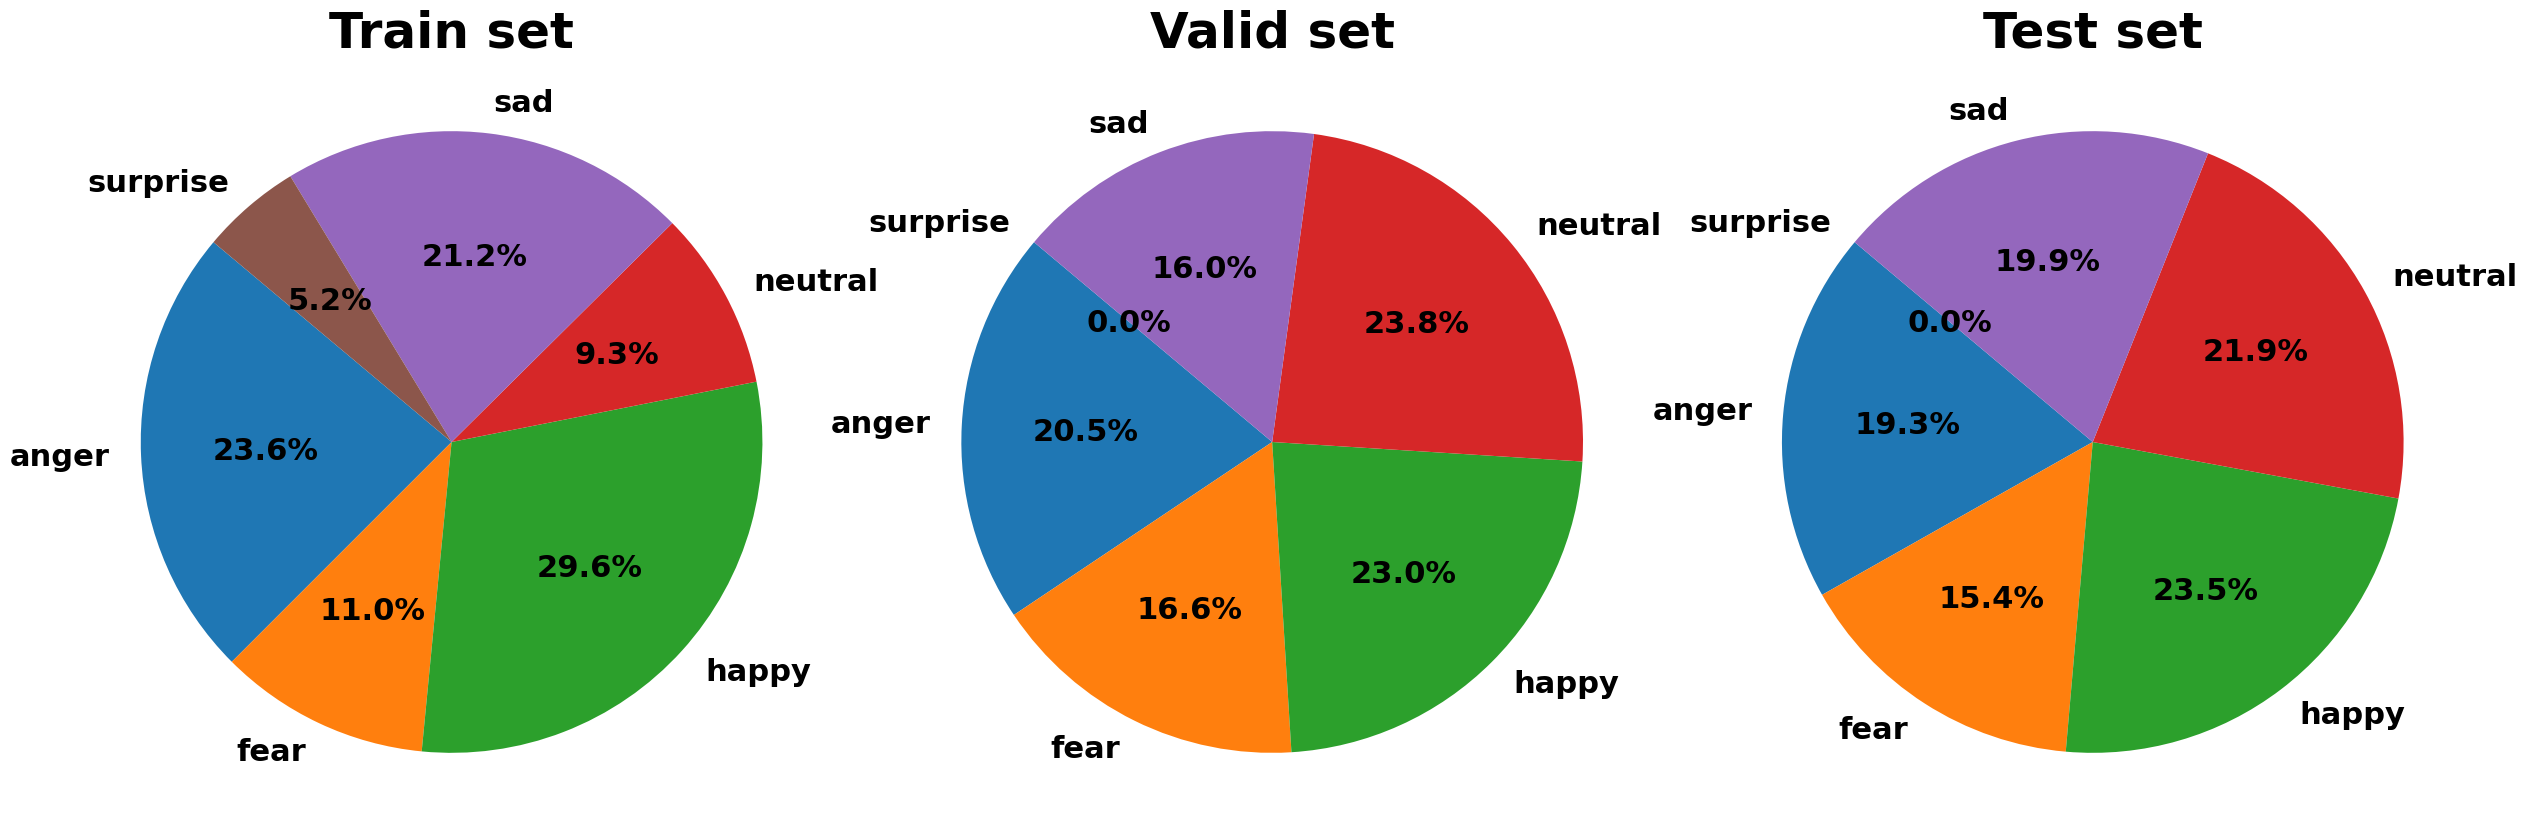

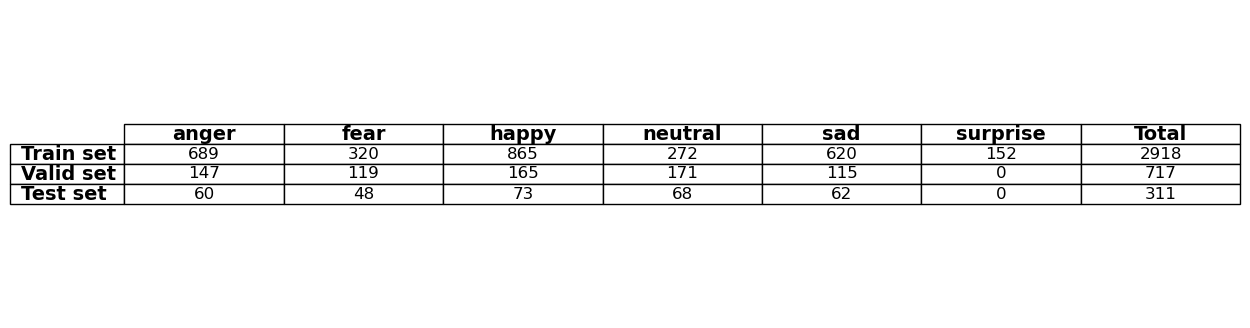

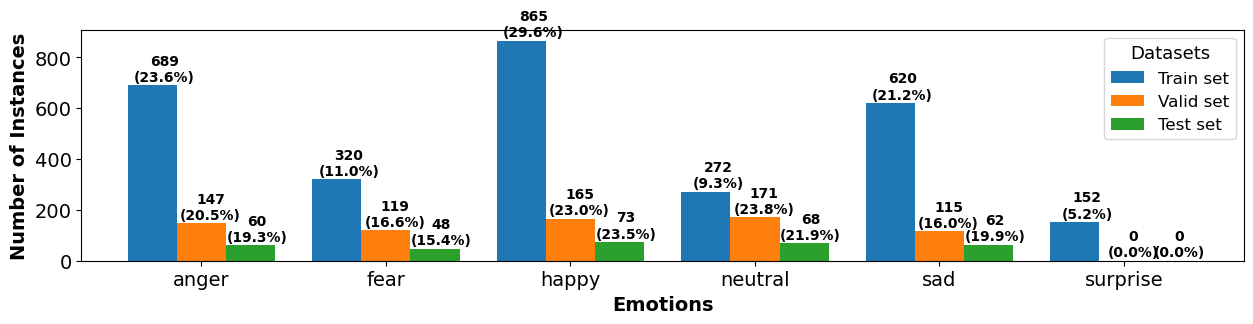

In [2]:
paths = [
    '/Users/piglet/Desktop/expression/*expression/train/labels',
    '/Users/piglet/Desktop/expression/*expression/valid/labels',
    '/Users/piglet/Desktop/expression/*expression/test/labels'
]
dataset_names = ['Train set', 'Valid set', 'Test set']
analyze_yolo_dataset_multiple(paths, dataset_names)